# Assignment 2

In [201]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, sin
from textwrap import wrap

## A potential flow 

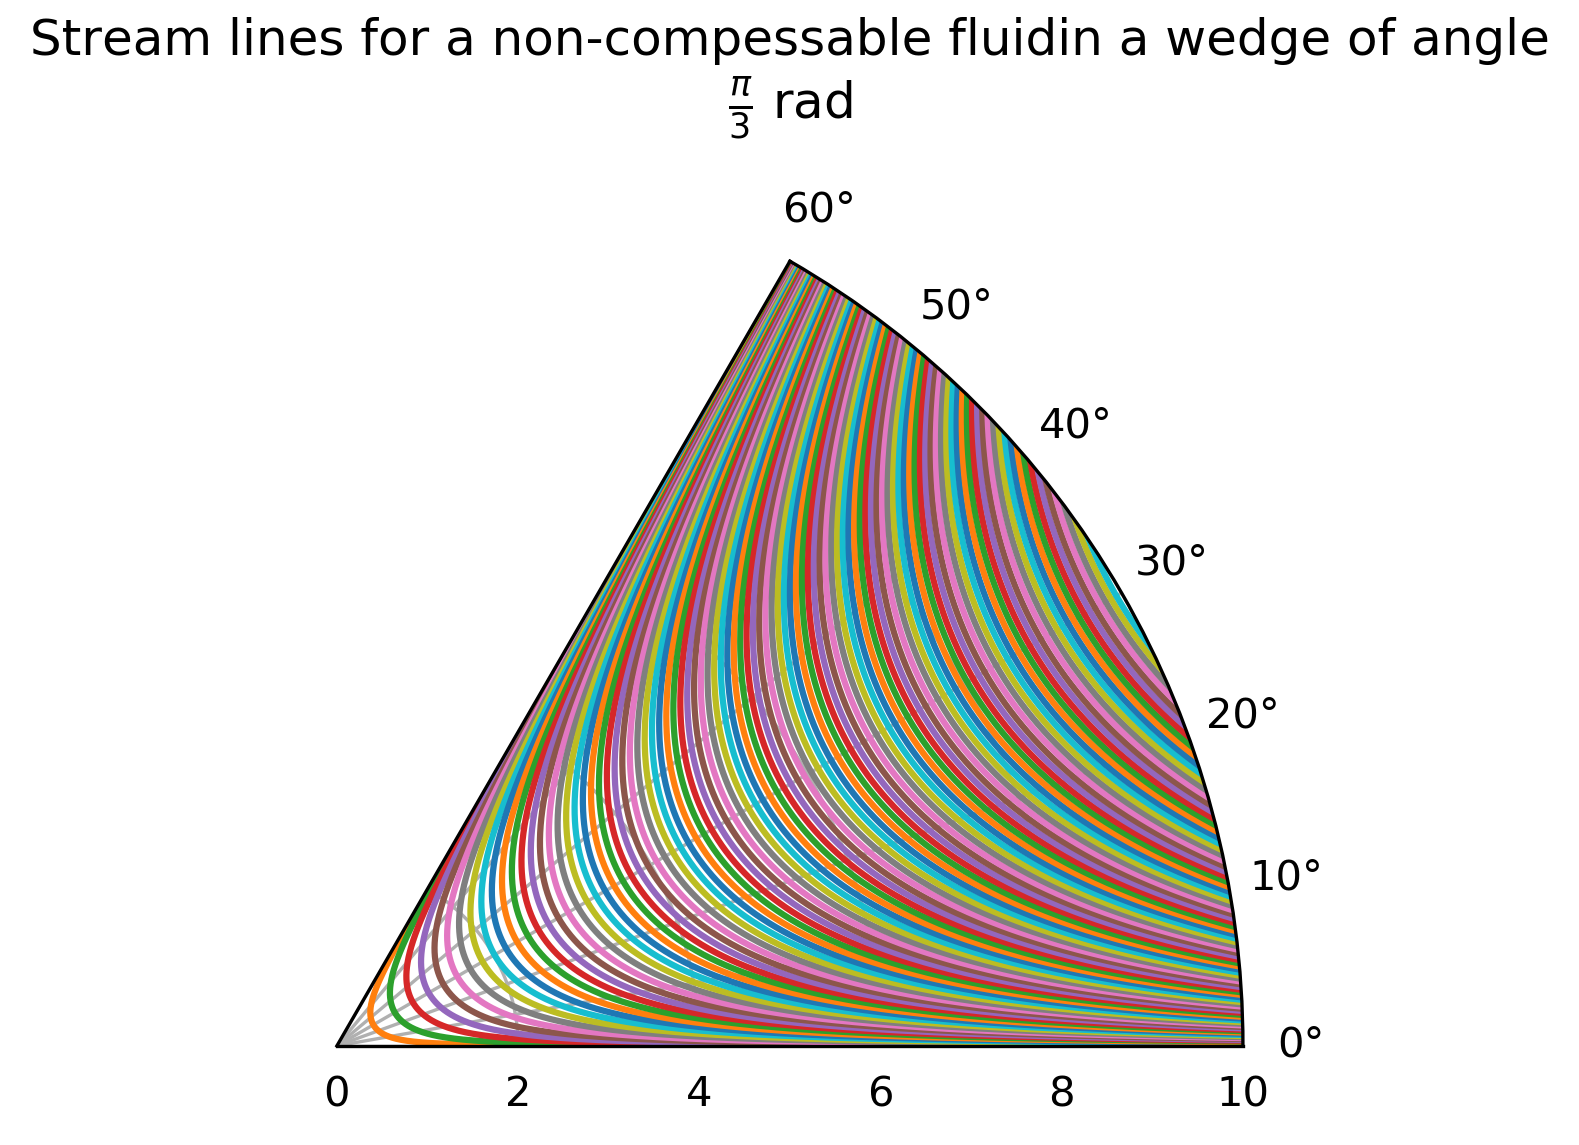

In [221]:
alpha = pi/3
theta = np.linspace(10**-100, alpha-10**-100, 1000)
n = 1

fig = plt.figure(dpi = 300)
ax = fig.add_subplot(111, projection='polar')

for C in range(100):
    c = C*0.1 # To space out the lines
    s = sin(n*pi*theta/alpha)
    r = (C*c*n/s)**(alpha/(n*pi))
    ax.plot(theta, r)

Title = wrap(r"Stream lines for a non-compessable fluid"
             r"in a wedge of angle $\frac{\pi}{3}$ rad")

plt.title("\n".join(Title))
ax.set_thetamin(0)
ax.set_thetamax(alpha*180/pi)
ax.set_ylim(0, 10)

## Contour intergals in electromagnetism

In [70]:
import sympy as sym 
import sympy.vector
from sympy import Derivative, symbols, simplify, sqrt, I, factorial, pi
from sympy.physics.mechanics import *
init_vprinting()

### Integral that needs evaluation

$\int_0^P \frac{\cos^2u}{[1+C\sin u]^5} du$ = $\frac{2^3}{C^5} \int_0^{2\pi} \frac{(z^2+1)^2 z^2}{(z-z_-)^5(z-z_+)^5} dz$

In [42]:
beta, theta, C, z = symbols('beta theta C z')

In [43]:
# C = beta * cos(theta)
z_p = (-I + I*sqrt(1-C**2))/C
z_m = (-I - I*sqrt(1-C**2))/C

#### $\Phi(z) = \frac{z^2(z^2+1)^2}{(z - z_-)^5}$

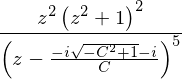

In [79]:
Coeff = 2**3 / C**5
IntTop = (z**2 + 1)**2 * z**2
IntDwn = (z-z_m)**5 * (z-z_p)**5
Int = IntTop/IntDwn
Phi = IntTop/(z-z_m)**5
phi = Phi.simplify()
phi

#### $\frac{d^4}{dz^4} \Phi(z)$

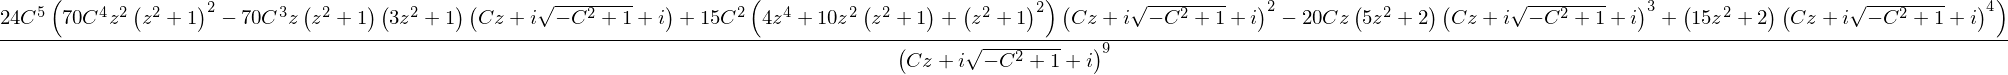

In [74]:
D = Derivative(phi, z, 4).doit().simplify()
D

#### Evaluating $\frac{d^4}{dz^4} \Phi(z)$ at $z = z_+$

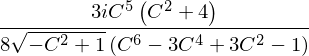

In [78]:
DVal = D.subs(z, z_p).simplify()
DVal

#### Here's the residue

 $ \frac{1}{4!} \frac{d^4}{dz^4} \Phi(z_+)$

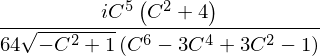

In [77]:
Res = DVal / factorial(4)
Res

#### Value of integral

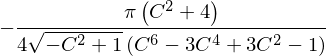

In [65]:
Integral = 2*pi*I*Res * Coeff
Integral.simplify()